Title         0
Genre         0
Premiere      0
Runtime       0
IMDB Score    0
Language      0
dtype: int64
             Title                  Genre   Premiere  Runtime  IMDB Score  \
0  Enter the Anime            Documentary 2019-08-05       58         2.5   
1      Dark Forces               Thriller 2020-08-21       81         2.6   
2          The App  Science fiction/Drama 2019-12-26       79         2.6   
3   The Open House        Horror thriller 2018-01-19       94         3.2   
4      Kaali Khuhi                Mystery 2020-10-30       90         3.4   

           Language   Weekday     Month  Year  
0  English/Japanese    Monday    August  2019  
1           Spanish    Friday    August  2020  
2           Italian  Thursday  December  2019  
3           English    Friday   January  2018  
4             Hindi    Friday   October  2020  


    Language                    Genre  \
0    English              Documentary   
1    English             One-man show   
2    English             Concert Film   
3    English             Concert Film   
4    English              Documentary   
..       ...                      ...   
396  English                 Thriller   
397  English              Documentary   
398  English  Musical/Western/Fantasy   
399  English      Heist film/Thriller   
400  English          Horror thriller   

                                          Title  IMDB Score  
0      David Attenborough: A Life on Our Planet         9.0  
1                       Springsteen on Broadway         8.5  
2    Ben Platt: Live from Radio City Music Hall         8.4  
3         Taylor Swift: Reputation Stadium Tour         8.4  
4                       Cuba and the Cameraman          8.3  
..                                          ...         ...  
396                                       Mercy         4.2  
397        

<ipython-input-64-9065b67614ee>:102: UserWarning:

FixedFormatter should only be used together with FixedLocator



<ipython-input-64-9065b67614ee>:131: UserWarning:

FixedFormatter should only be used together with FixedLocator



Most movies released in the year
Year
2020    183
Name: count, dtype: int64


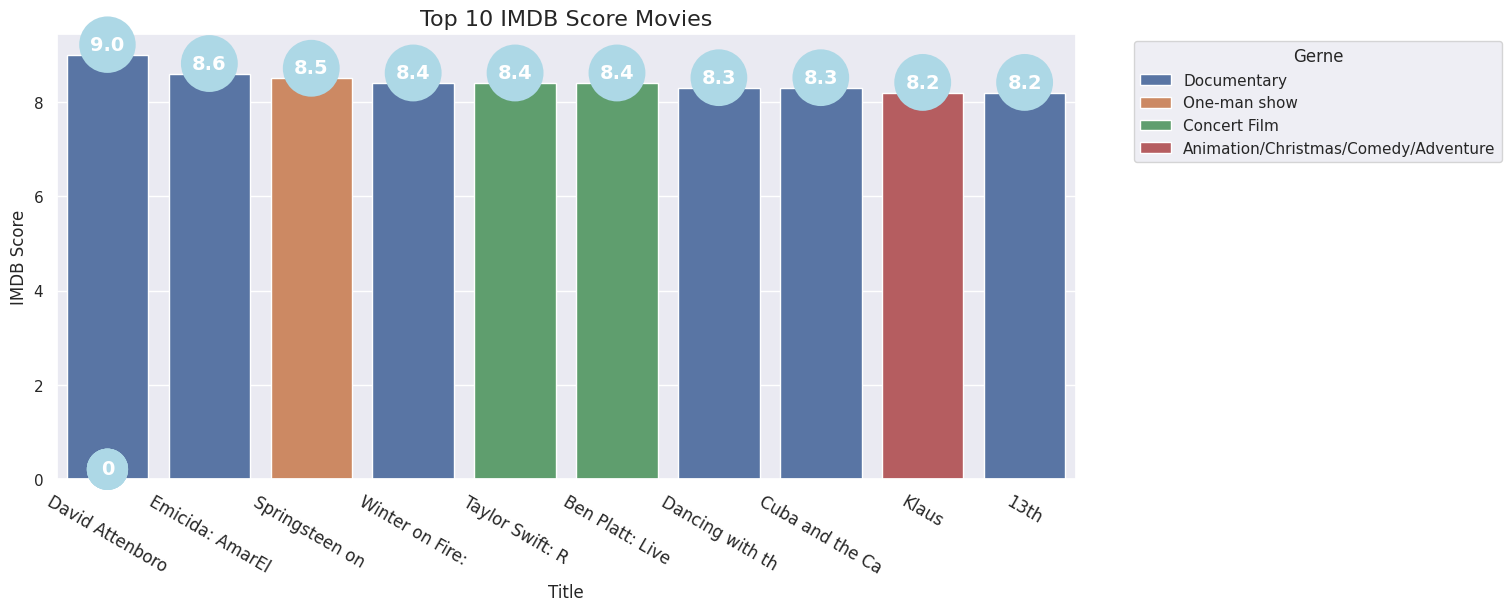

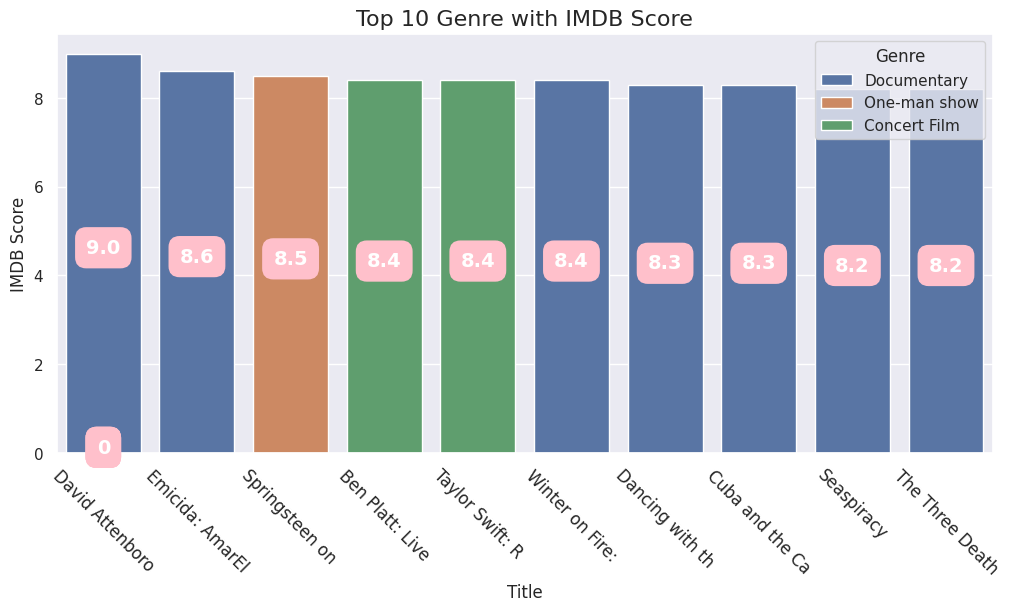

In [ ]:
# from itertools import groupby
#adding libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import plotly.express as px

#adding dataset:
raw_data=pd.read_csv('/content/NetflixOriginals.csv',encoding='latin-1')
raw_data.head()

#checking whether any object is null in thne given data
print(raw_data.isnull().sum())
#no data is null so not removing any column yet.

#since we can see data in premier is not in a usefull manner
#converting in a standard form:
raw_data['Premiere']=pd.to_datetime(raw_data['Premiere'],format='mixed')
raw_data.head()
#creatign new columns for weekday,month,year they will help in further anasylses
raw_data['Weekday']=raw_data['Premiere'].dt.day_name()
raw_data['Month']=raw_data['Premiere'].dt.month_name()
raw_data['Year']=raw_data['Premiere'].dt.year
raw_data.head()

#creating a check point:
data=raw_data.copy()
print(data.head())

#ansewering the first question of the user:


#1.In which language was the long hour film created
#we used this way bcz language, title and Runtime are of different datatypes
data_1=data.groupby(['Language','Title'])['Runtime'].mean().sort_values(ascending=False).reset_index()
data_1.head()
#for ansewring the question we need a representation in which we could represent each and every Title seperable and easily i.e.px.box
fig1=px.box(data,x='Runtime',hover_data=data[['Title','Language']])
fig1.update_traces(quartilemethod='inclusive')
#we made this inclusive bcz while calculation now min and max values of data are also included this leads to slightly wider IQRs which gives more info about the middle data this is aroend 50% data.
fig1.show()


#2.Find and visualize the IMDB values of the movies shot in the 'Documentary' genre between January 2019 and June 2020.
data2=data[(data['Genre']=='Documentary')&((data['Year']==2019)|((data['Year']==2020)&((data['Month']=='January')|(data['Month']=='February')|(data['Month']=='March')|(data['Month']=='April')|(data['Month']=='May')|(data['Month']=='June'))))]
#to solve this we will form scatter plot:
#on the basis of title
fig2=px.scatter(data2,x='Year',y='IMDB Score',color='Title')
#on the basis of month:
fig3=px.scatter(data2,x='Year',y='IMDB Score',color='Month')
fig2.show()
fig3.show()

#3.Which genre has the highest IMDB rating among movies shot in English?:
#to solve thiks question we can make graph and dataframe both but scince we had a experience of box above so lets make a data frame for more details:
top_imbd_english=data[data['Language']=='English']
top_imbd_english=top_imbd_english.groupby(['Language','Genre','Title'])['IMDB Score'].mean().sort_values(ascending=False).reset_index()
print(top_imbd_english)

#4.What is the average 'runtime' of movies shot in 'Hindi'?
data_hindi=data[data['Language']=='Hindi']
print("the average 'runtime' of movies shot in 'Hindi is:")
print(data_hindi.Runtime.mean())

#5.How many categories does the Genre Column have and what are they? Visualize it.
# this is the different genre and their count
genre = data['Genre'].value_counts()
data_genre = pd.DataFrame({'Genre': genre.index, 'count': genre.values})
data_genre['Percentage']=(data_genre['count']/data_genre['count'].sum())*100
# data_genre['avg_run_time']=data.groupby('Genre')['Runtime'].mean()
data_genre['avg_run_time'] = data.groupby('Genre')['Runtime'].mean().reset_index(name='avg_run_time')['avg_run_time']
print(data_genre)
# print(data_genre)
fig4=px.bar(data_genre,x='Genre',y='count')
fig4.show()

#6.Find the 3 most used languages in the movies in the data set.
data_top_3=data['Language'].value_counts().nlargest(3)
# plotting graph: we can make both bar graph and pie chart, let's try pie chart this time:
fig5 = px.pie(data_top_3, values=data_top_3.values, names=data_top_3.index)
fig5.show()

#7.Top 10 Movies With IMDB Ratings
data_top_10=data.sort_values(by='IMDB Score',ascending=False).head(10).reset_index()

data_top_10.head(10)

fig6,ax=plt.subplots(1,1,figsize=(15,6),constrained_layout=True)
ax=sns.barplot(x='Title',y='IMDB Score',data=data_top_10,hue='Genre')

for i in ax.patches:
    ax.text(x = i.get_x() + i.get_width()/2, y = i.get_height()+0.1,
            s = f"{i.get_height()}",
            ha = 'center', size = 14, weight = 'bold', rotation = 0, color = 'white',
            bbox=dict(boxstyle="circle,pad=0.5", fc='lightblue', ec="lightblue", lw=2))


ax.set_xlabel('Title',fontsize=12)
ax.set_ylabel('IMDB Score',fontsize=12)
ax.set_xticklabels([i[:15] for i in data_top_10['Title'].unique()],fontsize=12,rotation=-30)
plt.title('Top 10 IMDB Score Movies',fontsize=16)
plt.legend(title='Gerne', bbox_to_anchor=(1.05, 1), loc='upper left')

#8.What is the correlation between IMDB score and 'Runtime'? Examine and visualize.

data_new=data[['IMDB Score','Runtime']]
# data_new.corr() calucaltes the pair wise relation between them

#forming scatter plot:
fig7=px.scatter(data_new,x='IMDB Score',y='Runtime')
fig7.show()

#9.Top 10 Genre by IMDB Score
data_top_10_genre=data.groupby(['Genre','Title']).mean(['IMDB Score']).sort_values(by='IMDB Score',ascending=False).reset_index().iloc[:10,:]
data_top_10_genre
#making a plot similar to second last one
fig8,ax=plt.subplots(1,1,figsize=(10,6),constrained_layout=True)
ax=sns.barplot(x='Title',y='IMDB Score',data=data_top_10_genre,hue='Genre')

for i in ax.patches:
    ax.text(x = i.get_x() + i.get_width()/2, y = i.get_height()/2,
            s = f"{round(i.get_height(),1)}",
            ha = 'center', size = 14, weight = 'bold', rotation = 0, color = 'white',
            bbox=dict(boxstyle="round,pad=0.5", fc='pink', ec="pink", lw=2))


ax.set_xlabel('Title',fontsize=12)
ax.set_ylabel('IMDB Score',fontsize=12)
ax.set_xticklabels([i[:15] for i in data_top_10_genre['Title'].unique()],fontsize=12,rotation=-45)
plt.title('Top 10 Genre with IMDB Score',fontsize=16)

#10.What are the top 10 movies with the highest 'runtime'? Visualize it.
data_top_10_movies=data.sort_values(by='Runtime',ascending=False).reset_index().head(10)
data_top_10_movies

# fig9=px.bar(data_top_10_movies,x='Title',y='Runtime',color_discrete_sequence=px.colors.qualitative.Bold)
fig9=px.bar(data_top_10_movies,x='Title',y='Runtime',color='Genre')
fig9.show()

#11.In which year was the most movies released? Visualize it.
most_release=data['Year'].value_counts().nlargest(1)
print('Most movies released in the year')
print(most_release)

#visualization:
#visualization:
most_released_data = data['Year'].value_counts().reset_index().rename(columns={'index':'Year','Year':'Count'})
most_released_data = most_released_data.sort_values(by='count', ascending=False)
most_released_data.head()
fig10=px.bar(most_released_data,x='Count',y='count')
fig10.show()

#12.Is there any outlier data in the data set? Please explain.
fig=px.scatter(x=data['Runtime'],y=data['Title'])
fig.show()
#it is clearly visible that ireshman is the outlier